# LOGISTIC REGRESSION

This notebook will be exclusively for running Logistic Regressions for classifications using the datasets prepared on the 2000-2020_Data_Cleaning_Conditioning Jupyter Notebook. 

In principle there are two datasets, a first from 2010 to 2020 (including the most recent results), and a second from 2000 to 2010. 

The idea is to run a first model for all the Home Teams using the 2010-2020 dataset, then go into detail using this same data and looking to a couple of random teams, which I will select based on their known performance, so one top tier team and a tier two team. Then if the model's predictions work and seem reasonable, I will add the other 10 years of data (2000 to 2010), and run a new model for all the teams to see how it compares, then I will run the model for the same two teams that I previously chose. Finally this will give me an idea of which range of games in terms of years I should be using for my predictions. Remember that before I embarked on the process of cleaning the Dataset for the 20 years (2000 to 2020), I ran a series of models with very good results with data from only one season (2018-2019). Therefore, I have a dataset from only one season (2018-2019), and a couple of datasets for each of the last two decades.  

## Importing Libraries and Data Loading

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import itertools
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from IPython.display import Image
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

As mentioned in the short introduction above, the dataset that I am going to be working on this notebook has been split into two separating them by decade. The main reason to split it into decades is the game changes that the NBA has gone through. Hopefully some of our models will show this, and if so, I will comment on them and try to add some references to justify those changes. 

The first dataset which I will call df1 for the time being will contain data from 2010 until 2020, including the most recent NBA matches. Thee second dataset will be from 2000 until 2010. The stat columns are exactly the same. 

Because the goal of this project is to try to predict the winner of Regular Season matches, I will concentrate a lot more on the 2010 to 2020 dataset and probably will have to filter that data into 5 years or even less. 

So far I did a few models with 1 year data (2018-2019) with very good results, so I'm wondering at this moment, how will a model with 10 year data will perform? and even more, how about with 20 years of data? does it make sense to do it that way when most probably players won't be the same? hopefully with the models I will be able to answer these questions.

The idea of using first a one season dataset was to run a test and see how well it worked. Predictions have been quite good, but we will compare and discuss these further along with models to come.

Lets get the data loaded and start this notebook with a Logistic Regression and take it from there.

## Logistic Regression Classification

### 2018 - 2019 Dataset

In [75]:
df1S = pd.read_csv('2018-2019_Model_Ready.csv', index_col=0)
df1S.head()

,Game_Result,Team1_OFFRTG,Team1_DEFRTG,Team1_AST/TO,Team1_REB_P,Team1_FG_P,Team1_FGA,Team1_PACE,Team1_3PA,Team1_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_AST/TO,Team2_REB_P,Team2_FG_P,Team2_FGA,Team2_PACE,Team2_3PA,Team2_3P_P
0,1,106.3,107.5,1.83,51.1,43.5,93.1,104.39,35.9,33.8,100.8,96.2,1.66,50.6,41.8,89.3,101.50,33.6,32.8
1,1,102.4,105.0,1.30,50.8,42.8,93.8,106.08,29.7,27.5,120.3,107.5,2.00,51.1,52.4,89.1,104.00,31.9,41.8
2,0,113.2,98.2,1.57,53.4,48.0,91.4,106.00,40.6,38.4,114.9,109.1,2.09,49.2,46.3,91.0,100.44,34.5,37.7
3,1,108.0,111.4,1.46,48.7,45.4,87.5,99.15,35.8,38.1,107.6,108.7,1.34,52.3,43.3,92.7,100.37,32.3,32.3
4,1,104.9,101.5,1.73,47.9,43.5,82.7,98.67,29.0,36.8,112.1,105.5,1.67,49.2,50.6,86.0,97.13,22.3,41.6


In [76]:
df1S.isna().sum()

Game_Result     0
Team1_OFFRTG    0
Team1_DEFRTG    0
Team1_AST/TO    0
Team1_REB_P     0
Team1_FG_P      0
Team1_FGA       0
Team1_PACE      0
Team1_3PA       0
Team1_3P_P      0
Team2_OFFRTG    0
Team2_DEFRTG    0
Team2_AST/TO    0
Team2_REB_P     0
Team2_FG_P      0
Team2_FGA       0
Team2_PACE      0
Team2_3PA       0
Team2_3P_P      0
dtype: int64

In [77]:
df1S.shape

(1190, 19)

In [78]:
df1S.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190 entries, 0 to 1277
Data columns (total 19 columns):
Game_Result     1190 non-null int64
Team1_OFFRTG    1190 non-null float64
Team1_DEFRTG    1190 non-null float64
Team1_AST/TO    1190 non-null float64
Team1_REB_P     1190 non-null float64
Team1_FG_P      1190 non-null float64
Team1_FGA       1190 non-null float64
Team1_PACE      1190 non-null float64
Team1_3PA       1190 non-null float64
Team1_3P_P      1190 non-null float64
Team2_OFFRTG    1190 non-null float64
Team2_DEFRTG    1190 non-null float64
Team2_AST/TO    1190 non-null float64
Team2_REB_P     1190 non-null float64
Team2_FG_P      1190 non-null float64
Team2_FGA       1190 non-null float64
Team2_PACE      1190 non-null float64
Team2_3PA       1190 non-null float64
Team2_3P_P      1190 non-null float64
dtypes: float64(18), int64(1)
memory usage: 185.9 KB


#### Splitting the Data

In [79]:
# Define X and y
y = df1S['Game_Result']
X = df1S.drop(columns=['Game_Result'], axis=1)

# Splitting the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the value_counts() for y_train and y_test to verify the split
print(y_train.value_counts(), '\n\n', y_test.value_counts())

1    530
0    362
Name: Game_Result, dtype: int64 

 1    180
0    118
Name: Game_Result, dtype: int64


#### Fitting the Model

In [80]:
# Instantiating the model
logreg = LogisticRegression()

In [81]:
# Fitting the model with the train data
logreg = LogisticRegression(fit_intercept=False, C=1e16, random_state=2, solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1e+16, fit_intercept=False, random_state=2,
                   solver='liblinear')

#### Evaluating the Classifier/Model

In [82]:
print("Model Score for the Test data:")
display(logreg.score(X_test, y_test)) # shows the accuracy of the model
print("Model Score for the Train data:")
display(logreg.score(X_train, y_train)) # shows the Logistic Regression Score

Model Score for the Test data:


0.7684563758389261

Model Score for the Train data:


0.718609865470852

In [83]:
y_pred = logreg.predict(X_test)

In [84]:
print(metrics.accuracy_score(y_test, y_pred)) # Percentage of correct predictions

0.7684563758389261


The one season (1 year) Logistic Regression model is predicting that in 76.85% of the home games, the home team will win. This is a general value calculated for all the 30 teams. It is actually higher by 1.85% than the NBA Analysts predictions which has been published as 75%. This means that most probably my model is over-fitted or there is something not entirely correct with my data as I was expecting to be below this number (75%) and not above. Let's continue looking at some tests to see if I can understand what happened better.

We could start by looking at the predictions of our model compared to the True values:

In [85]:
print("True:     ", y_test.values[0:30]) # These are the real values
print("Predicted:", y_pred[0:30]) # These correspond to the predicted values

True:      [1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1]
Predicted: [0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1]


Looking closely it is obvious that the models seems to be ok matching when the Home Team True value is a 1, which is equal to a win, and the flows are mainly when the team losses, in which case the model sometimes predicts a win. Lets look at the Classification Report to see if I am right on this comment:

In [86]:
y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       118
           1       0.78      0.85      0.82       180

    accuracy                           0.77       298
   macro avg       0.76      0.75      0.75       298
weighted avg       0.77      0.77      0.77       298



Actually yes, this suggests that we are over-predicting the wins (1). The Accuracy is not bad though. Here it is rounded at 77 but so almost 2% above the NBA Analyst's one. Now let's have a look at the ROC:

#### ROC curve for the predictions

Train AUC: 0.7596059626811217
Test AUC: 0.8206214689265536


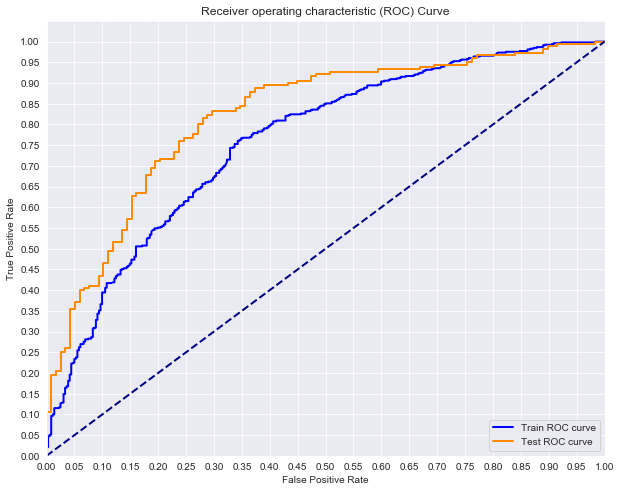

In [87]:
y_train_score = logreg.decision_function(X_train)
y_test_score = logreg.decision_function(X_test)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Obviously considerably better than flipping a coin. Not ideal as I mentioned, but I'm happy with the predictions. 

Now this value (accuracy) and tests that I have done give me an average for all teams, but if I want to make a bet, I would want to know per team, so lets jump into calculating these average values for a couple of teams (San Antonio Spurs and the Miami Heat)

#### Model Test I

In [103]:
df_SAS = pd.read_csv('df_SAS_1S.csv', index_col=0)
df_SAS.head(2)

,Game_Result,Team1_OFFRTG,Team1_DEFRTG,Team1_AST/TO,Team1_REB_P,Team1_FG_P,Team1_FGA,Team1_PACE,Team1_3PA,Team1_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_AST/TO,Team2_REB_P,Team2_FG_P,Team2_FGA,Team2_PACE,Team2_3PA,Team2_3P_P
9,1,111.4,114.2,1.64,48.7,44.8,92.4,103.94,28.9,38.1,111.9,110.6,2.02,50.8,46.6,91.7,99.33,22.3,39.1
57,0,112.1,105.5,1.67,49.2,50.6,86.0,97.13,22.3,41.6,111.9,110.6,2.02,50.8,46.6,91.7,99.33,22.3,39.1


The San Antonio Spur recorded a home record of 78.57% by winning 33 out of 42 of their home games

In [105]:
df_SAS.Game_Result.value_counts()

1    33
0     9
Name: Game_Result, dtype: int64

In [93]:
# Define X and y
y = df_SAS['Game_Result']
X = df_SAS.drop(columns=['Game_Result'], axis=1)

# Splitting the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the value_counts() for y_train and y_test to verify the split
print(y_train.value_counts(), '\n\n', y_test.value_counts())

1    23
0     8
Name: Game_Result, dtype: int64 

 1    10
0     1
Name: Game_Result, dtype: int64


In [94]:
# Instantiating the model
logreg = LogisticRegression()

In [95]:
# Fitting the model with the train data
logreg = LogisticRegression(fit_intercept=False, C=1e16, random_state=2, solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1e+16, fit_intercept=False, random_state=2,
                   solver='liblinear')

In [96]:
print("Model Score for the Test data:")
display(logreg.score(X_test, y_test)) # shows the accuracy of the model
print("Model Score for the Train data:")
display(logreg.score(X_train, y_train)) # shows the Logistic Regression Score

Model Score for the Test data:


0.7272727272727273

Model Score for the Train data:


0.9032258064516129

In [97]:
y_pred = logreg.predict(X_test)

In [98]:
print(metrics.accuracy_score(y_test, y_pred)) # Percentage of correct predictions

0.7272727272727273


In [100]:
y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       1.00      0.70      0.82        10

    accuracy                           0.73        11
   macro avg       0.62      0.85      0.61        11
weighted avg       0.93      0.73      0.79        11



The accuracy is not far from the reality by predicting 72.72% whereas the True value is 78.56%. I'm happy by being just over 6% below the True values. Let's look now at the second team (Miami Heat)

#### Model test II

In [106]:
df_MIA = pd.read_csv('df_MIA_1S.csv', index_col=0)
df_MIA.head(2)

,Game_Result,Team1_OFFRTG,Team1_DEFRTG,Team1_AST/TO,Team1_REB_P,Team1_FG_P,Team1_FGA,Team1_PACE,Team1_3PA,Team1_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_AST/TO,Team2_REB_P,Team2_FG_P,Team2_FGA,Team2_PACE,Team2_3PA,Team2_3P_P
30,0,114.9,109.1,2.09,49.2,46.3,91.0,100.44,34.5,37.7,108.9,107.6,1.37,53.6,43.6,91.4,102.71,33.9,35.4
53,1,105.2,109.8,1.39,51.0,43.1,91.8,100.56,30.8,36.2,108.9,107.6,1.37,53.6,43.6,91.4,102.71,33.9,35.4


In [107]:
df_MIA.Game_Result.value_counts()

0    21
1    19
Name: Game_Result, dtype: int64

The Miami Heat recorded a home record of 52.5%

In [124]:
# Define X and y
y = df_MIA['Game_Result']
X = df_MIA.drop(columns=['Game_Result'], axis=1)

# Splitting the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

# Print the value_counts() for y_train and y_test to verify the split
print(y_train.value_counts(), '\n\n', y_test.value_counts())

0    16
1    14
Name: Game_Result, dtype: int64 

 1    5
0    5
Name: Game_Result, dtype: int64


In [125]:
# Instantiating the model
logreg = LogisticRegression()

In [128]:
# Fitting the model with the train data
logreg = LogisticRegression(fit_intercept=False, C=1e16, random_state=20, solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1e+16, fit_intercept=False, random_state=20,
                   solver='liblinear')

In [129]:
print("Model Score for the Test data:")
display(logreg.score(X_test, y_test)) # shows the accuracy of the model
print("Model Score for the Train data:")
display(logreg.score(X_train, y_train)) # shows the Logistic Regression Score

Model Score for the Test data:


0.4

Model Score for the Train data:


0.8333333333333334

In [130]:
y_pred = logreg.predict(X_test)

In [131]:
print(metrics.accuracy_score(y_test, y_pred)) # Percentage of correct predictions

0.4


In [132]:
y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.60      0.50         5
           1       0.33      0.20      0.25         5

    accuracy                           0.40        10
   macro avg       0.38      0.40      0.38        10
weighted avg       0.38      0.40      0.38        10



For this team the model really under-performed with an accuracy of 40%. This is worse than flipping a coin, but then the reality if that with this team that is what you get. At 52.5% of the Home Games won, it is the same as flipping a coin which is 50%. The sample of 1 year it is not enough for this type of teams, or simply it is not a good team to bet on as anything can happen


### 2010 - 2020 Dataset

Lets load and look right away and both data sets (2010-2020 and 2000-2010):

In [133]:
df1 = pd.read_csv('2010-2020_Model_Ready.csv', index_col=0)
print("df1:")
display(df1.head(3))
df2 = pd.read_csv('2000-2010_Model_Ready.csv', index_col=0)
print("=============================================================================")
print("df2:")
display(df2.head(3))

df1:


,Game_Result,Team1_FGA,Team1_FG_P,Team1_3PA,Team1_3P_P,Team1_OFFRTG,Team1_DEFRTG,Team1_REB_P,Team1_AST/TO,Team1_PACE,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
0,1,96.0,46.5,43.2,38.0,112.2,114.2,46.9,1.89,106.09,86.8,46.3,36.8,38.0,107.5,99.1,51.1,1.26,104.23
1,1,87.5,45.7,29.0,33.6,107.9,96.8,51.4,1.54,101.00,84.0,49.6,29.5,36.7,112.9,107.5,49.6,1.35,101.50
2,1,94.0,41.1,36.2,29.3,103.7,109.6,45.2,1.81,101.80,86.0,46.3,35.8,41.9,104.9,114.2,47.3,1.30,103.00


df2:


,Game_Result,Team1_FGA,Team1_FG_P,Team1_3PA,Team1_3P_P,Team1_OFFRTG,Team1_DEFRTG,Team1_REB_P,Team1_AST/TO,Team1_PACE,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
0,0,62.0,56.5,9.0,55.6,114.0,89.1,56.6,0.94,92.5,81.0,37.0,15.0,40.0,89.1,114.0,43.4,1.08,92.5
1,0,78.0,41.0,7.0,28.6,87.8,83.7,52.3,0.84,98.0,85.0,36.5,10.0,30.0,83.7,87.8,47.7,1.60,98.0
2,1,72.0,45.8,7.0,57.1,87.8,99.0,53.3,0.74,98.0,79.0,43.0,16.0,37.5,99.0,87.8,46.7,1.33,98.0


In [134]:
df1.Game_Result.value_counts()

1    7160
0    5038
Name: Game_Result, dtype: int64

In [135]:
df2.Game_Result.value_counts()

1    9513
0    6269
Name: Game_Result, dtype: int64

#### Splitting the Data

In [136]:
# Define X and y
y = df1['Game_Result']
X = df1.drop(columns=['Game_Result'], axis=1)

# Splitting the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the value_counts() for y_train and y_test to verify the split
print(y_train.value_counts(), '\n\n', y_test.value_counts())

1    5365
0    3783
Name: Game_Result, dtype: int64 

 1    1795
0    1255
Name: Game_Result, dtype: int64


It worked well and respected the 25 and 75%

#### Fitting the Model

In [4]:
# Instantiating the model
logreg = LogisticRegression()

In [5]:
# Fitting the model with the train data
logreg = LogisticRegression(fit_intercept=False, C=1e16, random_state=2, solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1e+16, fit_intercept=False, random_state=2,
                   solver='liblinear')

In [6]:
logreg.predict(X_test) # Shows the predicted outputs...will be compare below...

array([0, 1, 1, ..., 0, 0, 1])

#### Evaluating the Classifier/Model

Let's see what the model score is for the Test and the Train datasets:

In [7]:
print("Model Score for the Test data:")
display(logreg.score(X_test, y_test)) # shows the accuracy of the model
print("Model Score for the Train data:")
display(logreg.score(X_train, y_train)) # shows the Logistic Regression Score

Model Score for the Test data:


0.7157377049180328

Model Score for the Train data:


0.7210319195452558

So, revisiting the accuracy of the metrics:

In [8]:
y_pred = logreg.predict(X_test)

In [9]:
print(metrics.accuracy_score(y_test, y_pred)) # Percentage of correct predictions

0.7157377049180328


The accuracy score of 71.57% is not bad, in fact it is very close to the NBA predictions done by their own analysts which accounts for just over 76%, so I'm off by 5% with thi simple Logistic Regression Model. 

Lets see an example with the first 30 predictions to see how well the model does quantitatively:

In [10]:
print("True:     ", y_test.values[0:30]) # These are the real values
print("Predicted:", y_pred[0:30]) # These correspond to the predicted values

True:      [0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1]
Predicted: [0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1]


Lets just remember that we are predicting the Home Team Winning. If we look carefully what this is telling us is that most of the times when the model is Predict wrongly, it happens when the Home Team Loses, the model ends up predicting a win. This is just an observation that can be illustrated by looking at the classification report below: 

In [11]:
y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.58      0.63      1255
           1       0.73      0.81      0.77      1795

    accuracy                           0.72      3050
   macro avg       0.71      0.70      0.70      3050
weighted avg       0.71      0.72      0.71      3050



The classification report shows that for losing games the Precision is 68% and for Recall 58%, whereas for the games won by the Home Team, the Precision is 73% and Recall 81%. Exactly what we see above on the True and Predicted printed values.

So far an Accuracy of 71.57% (rounded to 72% above) is very good for this purpose.

#### ROC curve for the predictions

Now that the model has been evaluated using a few quick metrics with thee help of sklearn, lets try to generate an ROC and see the match with the accuracy and predictions discussed above

Train AUC: 0.7870777666014068
Test AUC: 0.7751698498485168


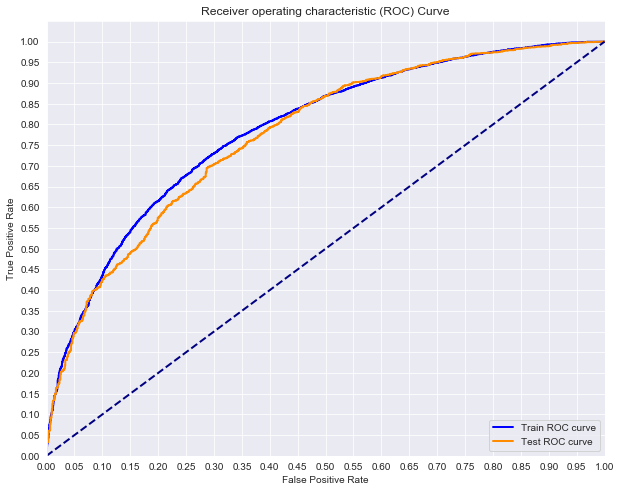

In [12]:
y_train_score = logreg.decision_function(X_train)
y_test_score = logreg.decision_function(X_test)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The relationship between the False and True Positive Rate is not the best, but it is considerably better to the changes we would get by flipping a coin. So we are not just guessing with a 50/50 chance. As the accuracy suggested, we have a +70% change of success in terms of guessing if the Home Team will win the games or not. 

As mentioned in the first evaluations done on the 2018-2019 season using the KNN Classifier, this Classification Model is being done for all the teams, and that, even when it is useful, it is not the best option. We would be better by knowing doing a model for an specific team, and ultimately for all the 30 teams. So lets see how this results when we chose three teams from the 2010-2020 decade with different records

#### Model Test I

The Model Test I refers to the first selected team to run the predictive model with. For thee first team I chose the San Antonio Spurs, which is one of the most successful franchises on the last decade, in fact it goes far back to the previous decade as well, therefore I am expecting a very high performance at home.

From one of the initial DataFrames created on the 2000-2020_Cleaning_Conditioning notebook (df_merge_a) I will create a separate dataframe with only the games were the San Antonio Spurs were the Home Team.

In [137]:
df_SAS = pd.read_csv('df_merge_a.csv', index_col=0)
df_SAS.head(2)

,Team1,Team1Score,Team2,Team2Score,year,month,Game_Result,Team1_year,Team1_month,Team1_FGA,...,Team2_month,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
0,New Orleans Pelicans,122,Toronto Raptors,130,2019,10,1,2019.0,10.0,96.0,...,10.0,86.8,46.3,36.8,38.0,107.5,99.1,51.1,1.26,104.23
1,Los Angeles Lakers,102,Los Angeles Clippers,112,2019,10,1,2019.0,10.0,87.5,...,10.0,84.0,49.6,29.5,36.7,112.9,107.5,49.6,1.35,101.50


In [138]:
df_SAS = df_SAS[df_SAS['Team2'] == 'San Antonio Spurs']

We have preserved only the games where the San Antonio Spurs are the home team. This way we can come up with a prediction only for this particular team. Lets check that it has worked properly though:

In [140]:
df_SAS.Game_Result.value_counts() 

1    334
0     81
Name: Game_Result, dtype: int64

The San Antonio Spurs have won 80.48% of their home games during the past decade

In [159]:
df_SAS = df_SAS.drop(['Team1', 'Team1Score', 'Team2Score', 'Team2', 'year', 'month', 'Team1_month', 'Team2_month', 'Team1_year', 'Team2_year'], axis=1)

In [160]:
df_SAS.head(2)

,Game_Result,Team1_FGA,Team1_FG_P,Team1_3PA,Team1_3P_P,Team1_OFFRTG,Team1_DEFRTG,Team1_REB_P,Team1_AST/TO,Team1_PACE,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
9,1,86.0,42.3,28.4,35.2,99.8,107.9,51.6,1.02,100.80,89.0,47.5,23.0,33.7,108.6,106.2,52.8,1.36,104.75
32,1,94.0,47.9,38.0,38.2,113.6,113.6,49.3,1.69,104.88,89.0,47.5,23.0,33.7,108.6,106.2,52.8,1.36,104.75


Now that we have the DF ready for the model, lets save this ready_to_model df as a csv file and then look at their real life performance during this past decade:

In [161]:
df_SAS.to_csv('SAS_2010-2020.csv')

In [18]:
df_SAS.Game_Result.value_counts()

1    334
0     81
Name: Game_Result, dtype: int64

So the San Antonio Spurs have been for a while one of the most successful teams in the NBA, so this is no surprise. They have won 80.50% of their home games in the last decade.  

In [19]:
# Define X and y
y = df_SAS['Game_Result']
X = df_SAS.drop(columns=['Game_Result'], axis=1)

# Splitting the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the value_counts() for y_train and y_test to verify th split
print(y_train.value_counts(), '\n\n', y_test.value_counts())

1    255
0     56
Name: Game_Result, dtype: int64 

 1    79
0    25
Name: Game_Result, dtype: int64


In [20]:
# Instantiating the model
logreg = LogisticRegression()

In [21]:
# Fitting the model with the train data
logreg = LogisticRegression(fit_intercept=False, C=1e16, random_state=2, solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1e+16, fit_intercept=False, random_state=2,
                   solver='liblinear')

In [22]:
print("Model Score for the Test data:")
display(logreg.score(X_test, y_test)) # shows the accuracy of the model
print("Model Score for the Train data:")
display(logreg.score(X_train, y_train))

Model Score for the Test data:


0.7980769230769231

Model Score for the Train data:


0.8553054662379421

As predicted the San Antonio Spurs win most of their Games at home. 

In [23]:
y_pred = logreg.predict(X_test)

In [24]:
print(metrics.accuracy_score(y_test, y_pred)) # Percentage of correct predictions

0.7980769230769231


In [25]:
print("True:     ", y_test.values[0:30]) # These are the real values
print("Predicted:", y_pred[0:30]) # These correspond to the predicted values

True:      [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0]
Predicted: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]


In [26]:
y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.32      0.43        25
           1       0.82      0.95      0.88        79

    accuracy                           0.80       104
   macro avg       0.74      0.63      0.65       104
weighted avg       0.78      0.80      0.77       104



##### ROC Curve

Train AUC: 0.79796918767507
Test AUC: 0.7460759493670885


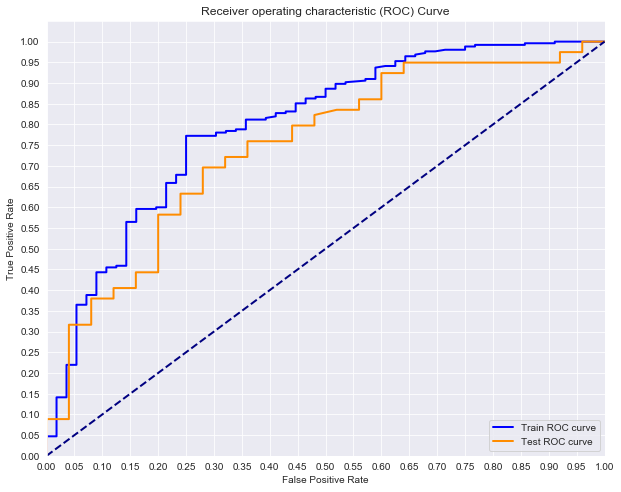

In [27]:
y_train_score = logreg.decision_function(X_train)
y_test_score = logreg.decision_function(X_test)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The model has an accuracy of 79.80% suggesting that that is the percentage of games played at Home by the San Antonio Spurs that they will win, and in reality, during the past 10 years, they have won 81% of the games. So it seems as the model is extremely close to the reality. It is a bit concerning though that there might be some over-fitting, so maybe other tests will give better results. Lets go to the second team and see what happens...

#### Model Test II

Let's look at another team but this time a random one. Let's say the Miami Heat. I know they have won a couple of championships but the rest of the seasons they have been average, or at least that is what I remember. So lets check.

In [142]:
df_MIA = pd.read_csv('df_merge_a.csv', index_col=0)
df_MIA.head(2)

,Team1,Team1Score,Team2,Team2Score,year,month,Game_Result,Team1_year,Team1_month,Team1_FGA,...,Team2_month,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
0,New Orleans Pelicans,122,Toronto Raptors,130,2019,10,1,2019.0,10.0,96.0,...,10.0,86.8,46.3,36.8,38.0,107.5,99.1,51.1,1.26,104.23
1,Los Angeles Lakers,102,Los Angeles Clippers,112,2019,10,1,2019.0,10.0,87.5,...,10.0,84.0,49.6,29.5,36.7,112.9,107.5,49.6,1.35,101.50


In [143]:
df_MIA = df_MIA[df_MIA['Team2'] == 'Miami Heat']
display(df_MIA.Game_Result.value_counts())

1    281
0    128
Name: Game_Result, dtype: int64

The Miami HEat have won 68.70 of their home games during the past decade

In [156]:
# Dropping unnecessary columns
df_MIA = df_MIA.drop(['Team1', 'Team1Score', 'Team2Score', 'Team2', 'year', 'month', 'Team1_month', 'Team2_month', 'Team1_year', 'Team2_year'], axis=1)

# Displaying the new DataFrame with only games played in Miami
display(df_MIA.head(2))

# Looking at the Miami Heat record for tha past decade
df_MIA.Game_Result.value_counts()

,Game_Result,Team1_FGA,Team1_FG_P,Team1_3PA,Team1_3P_P,Team1_OFFRTG,Team1_DEFRTG,Team1_REB_P,Team1_AST/TO,Team1_PACE,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
6,1,95.3,41.5,32.0,28.1,95.7,108.1,48.4,1.32,108.91,85.6,47.0,33.2,39.2,106.6,99.3,52.5,1.19,106.09
51,1,85.0,45.6,32.2,29.2,102.0,103.4,49.6,1.36,101.20,85.6,47.0,33.2,39.2,106.6,99.3,52.5,1.19,106.09


1    281
0    128
Name: Game_Result, dtype: int64

The Miami Heat have won their Home Court games in 69% of the time

Let's save this Dataframe as a .csv file and then go into the Model:

In [158]:
df_MIA.to_csv('MIA_2010-2020.csv')

In [31]:
# Define X and y
y = df_MIA['Game_Result']
X = df_MIA.drop(columns=['Game_Result'], axis=1)

# Splitting the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the value_counts() for y_train and y_test to verify th split
print(y_train.value_counts(), '\n\n', y_test.value_counts())

1    208
0     98
Name: Game_Result, dtype: int64 

 1    73
0    30
Name: Game_Result, dtype: int64


In [32]:
# Fitting the model with the train data
logreg = LogisticRegression(fit_intercept=False, C=1e16, random_state=2, solver='liblinear')
logreg.fit(X_train, y_train)

print("Model Score for the Test data:")
display(logreg.score(X_test, y_test)) # shows the accuracy of the model
print("Model Score for the Train data:")
display(logreg.score(X_train, y_train)) # shows the Logistic Regression Score

Model Score for the Test data:


0.6407766990291263

Model Score for the Train data:


0.7549019607843137

In [33]:
y_pred = logreg.predict(X_test)

In [34]:
print('The Peercentage of correct predictions is:', metrics.accuracy_score(y_test, y_pred)) # Percentage of correct predictions
print('===========================================================================')
print('A quick test of thee predictions compared to the true data:')
print("True:     ", y_test.values[0:30]) # These are the real values
print("Predicted:", y_pred[0:30]) # These correspond to the predicted values
print('===========================================================================')

y_pred = logreg.predict(X_test)


print('\n\nClassification Report:')
print('---------------------')
print('\n', classification_report(y_test, y_pred))

The Peercentage of correct predictions is: 0.6407766990291263
A quick test of thee predictions compared to the true data:
True:      [1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
Predicted: [0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0]


Classification Report:
---------------------

               precision    recall  f1-score   support

           0       0.35      0.27      0.30        30
           1       0.72      0.79      0.76        73

    accuracy                           0.64       103
   macro avg       0.54      0.53      0.53       103
weighted avg       0.62      0.64      0.63       103



As we already know, During the last Decade Miami has won 69% of their Home Games, and the model is predicting that they will win on 64% of the Home Games. A 5% error is actually not bad at all and makes me feel more comfortable than the results obtained for the San Antonio Spurs. 

So now lets try adding all the 20 years together and see what the predictions are. 

### 2000 - 2020 Dataset

In [35]:
print('DataFrame df1 containing stats from 2010 to 2020:')
display(df1.head(2))
print('DataFrame df2 containing stats from 2000 to 2010:')
display(df2.head(2))

DataFrame df1 containing stats from 2010 to 2020:


,Game_Result,Team1_FGA,Team1_FG_P,Team1_3PA,Team1_3P_P,Team1_OFFRTG,Team1_DEFRTG,Team1_REB_P,Team1_AST/TO,Team1_PACE,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
0,1,96.0,46.5,43.2,38.0,112.2,114.2,46.9,1.89,106.09,86.8,46.3,36.8,38.0,107.5,99.1,51.1,1.26,104.23
1,1,87.5,45.7,29.0,33.6,107.9,96.8,51.4,1.54,101.00,84.0,49.6,29.5,36.7,112.9,107.5,49.6,1.35,101.50


DataFrame df2 containing stats from 2000 to 2010:


,Game_Result,Team1_FGA,Team1_FG_P,Team1_3PA,Team1_3P_P,Team1_OFFRTG,Team1_DEFRTG,Team1_REB_P,Team1_AST/TO,Team1_PACE,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
0,0,62.0,56.5,9.0,55.6,114.0,89.1,56.6,0.94,92.5,81.0,37.0,15.0,40.0,89.1,114.0,43.4,1.08,92.5
1,0,78.0,41.0,7.0,28.6,87.8,83.7,52.3,0.84,98.0,85.0,36.5,10.0,30.0,83.7,87.8,47.7,1.60,98.0


Let's check the shape of each before we concatenate them together

In [36]:
print('Shape of df1:', df1.shape)
print('Shape of df2:', df2.shape)

Shape of df1: (12198, 19)
Shape of df2: (15782, 19)


In [37]:
df3 = df1.append(df2)
print('Shape of df3:', df3.shape) # the shape of df3 should be the result of adding df1 + df2

Shape of df3: (27980, 19)


Perfect for the append of df2 to df1. So now to the modeling...

#### Splitting the Data

In [38]:
# Define X and y
y = df3['Game_Result']
X = df3.drop(columns=['Game_Result'], axis=1)

# Splitting the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the value_counts() for y_train and y_test to verify the split
print(y_train.value_counts(), '\n\n', y_test.value_counts())

1    12489
0     8496
Name: Game_Result, dtype: int64 

 1    4184
0    2811
Name: Game_Result, dtype: int64


#### Fitting the Model

In [39]:
# Fitting the model with the train data
logreg = LogisticRegression(fit_intercept=False, C=1e16, random_state=2, solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1e+16, fit_intercept=False, random_state=2,
                   solver='liblinear')

#### Evaluating the Classifier/Model

In [40]:
print("Model Score for the Test data:")
display(logreg.score(X_test, y_test)) # shows the accuracy of the model
print("Model Score for the Train data:")
display(logreg.score(X_train, y_train)) # shows the Logistic Regression Score

Model Score for the Test data:


0.7175125089349536

Model Score for the Train data:


0.710650464617584

In [41]:
y_pred = logreg.predict(X_test)

In [42]:
print(metrics.accuracy_score(y_test, y_pred)) # Percentage of correct predictions

0.7175125089349536


The accuracy score of 71.75% is not bad, in fact, once again very close to the NBA predictions done by their own analysts which accounts for just over 76%, so I'm off by 4% with the simple Logistic Regression Model. 

Lets see an example with the first 30 predictions to see how well the model does quantitatively as we did for the first model:

In [43]:
print("True:     ", y_test.values[0:30]) # These are the real values
print("Predicted:", y_pred[0:30]) # These correspond to the predicted values

True:      [0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1]
Predicted: [0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1]


Now a view to the classification report would be useful:

In [44]:
y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.56      0.61      2811
           1       0.73      0.83      0.78      4184

    accuracy                           0.72      6995
   macro avg       0.71      0.69      0.70      6995
weighted avg       0.71      0.72      0.71      6995



As mentioned before, and accuracy of 71.75% (~72%) is actually a very good one, so I'm quite happy with the model results so far. This is only +5% below the predictions done by NBA analysts, although compared to the 71.57% from the original model with data from the last decade, the improvement is insignificant and what can happened is that for some teams, it might end up affecting the predictions as too many variables have changed from the teams 20 years ago.

#### ROC curve for the predictions

Train AUC: 0.7737900454094518
Test AUC: 0.7716637741105857


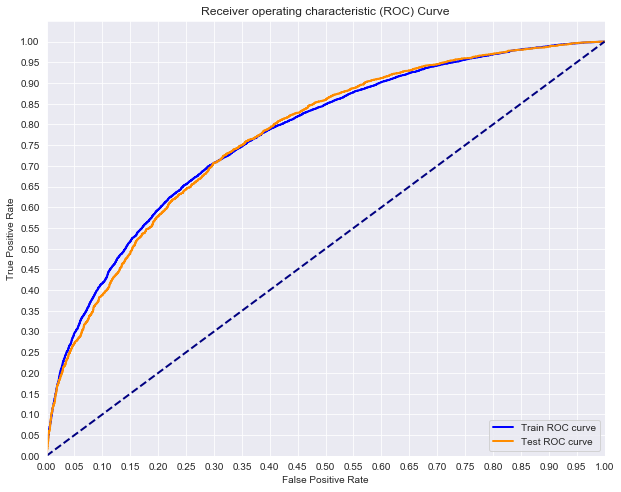

In [45]:
y_train_score = logreg.decision_function(X_train)
y_test_score = logreg.decision_function(X_test)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

It is seriously not bad, I must say that a I was not expecting this due to the number of games. Still personally I prefer to use 10 years of data of even less so that I am closer to today's team members and performances.

#### Model Test I

Lets now run the same tests for the first team which was the San Antonio Spurs:

In [144]:
df_SAS_a = pd.read_csv('df_merge_a.csv', index_col=0)
df_SAS_b = pd.read_csv('df_merge_b.csv', index_col=0)

In [145]:
df_SAS_a = df_SAS_a[df_SAS_a['Team2'] == 'San Antonio Spurs']
df_SAS_b = df_SAS_b[df_SAS_b['Team2'] == 'San Antonio Spurs']
df_SAS_2 = df_SAS_a.append(df_SAS_b) # This will append both DataFrames
print('Shape of df_SAS_a:', df_SAS_a.shape)
print('Shape of df_SAS_b:', df_SAS_b.shape)
print('Shape of new DataFrame:', df_SAS_2.shape)

Shape of df_SAS_a: (415, 29)
Shape of df_SAS_b: (534, 29)
Shape of new DataFrame: (949, 29)


In [146]:
df_SAS_2.head(2)

,Team1,Team1Score,Team2,Team2Score,year,month,Game_Result,Team1_year,Team1_month,Team1_FGA,...,Team2_month,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
9,New York Knicks,111,San Antonio Spurs,120,2019,10,1,2019.0,10.0,86.0,...,10.0,89.0,47.5,23.0,33.7,108.6,106.2,52.8,1.36,104.75
32,Washington Wizards,122,San Antonio Spurs,124,2019,10,1,2019.0,10.0,94.0,...,10.0,89.0,47.5,23.0,33.7,108.6,106.2,52.8,1.36,104.75


In [147]:
df_SAS_2 = df_SAS_2.drop(['Team1', 'Team1Score', 'Team2Score', 'Team2', 'year', 'month', 'Team1_month', 'Team2_month', 'Team1_year', 'Team2_year'], axis=1)
df_SAS_2.head(2)

,Game_Result,Team1_FGA,Team1_FG_P,Team1_3PA,Team1_3P_P,Team1_OFFRTG,Team1_DEFRTG,Team1_REB_P,Team1_AST/TO,Team1_PACE,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
9,1,86.0,42.3,28.4,35.2,99.8,107.9,51.6,1.02,100.80,89.0,47.5,23.0,33.7,108.6,106.2,52.8,1.36,104.75
32,1,94.0,47.9,38.0,38.2,113.6,113.6,49.3,1.69,104.88,89.0,47.5,23.0,33.7,108.6,106.2,52.8,1.36,104.75


In [149]:
df_SAS_2.Game_Result.value_counts()

1    749
0    200
Name: Game_Result, dtype: int64

Before I continue I will save this DF as a .csv file so that it can be used directly

In [162]:
df_SAS_2.to_csv('df_SAS_2.csv')

The San Antonio Spurs have won 78.93% of their home games during the past 20 years

In [50]:
# Define X and y
y = df_SAS_2['Game_Result']
X = df_SAS_2.drop(columns=['Game_Result'], axis=1)

# Splitting the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the value_counts() for y_train and y_test to verify th split
print(y_train.value_counts(), '\n\n', y_test.value_counts())

1    558
0    153
Name: Game_Result, dtype: int64 

 1    191
0     47
Name: Game_Result, dtype: int64


In [51]:
# Fitting the model with the train data
logreg = LogisticRegression(fit_intercept=False, C=1e16, random_state=2, solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1e+16, fit_intercept=False, random_state=2,
                   solver='liblinear')

In [52]:
print("Model Score for the Test data:")
display(logreg.score(X_test, y_test)) # shows the accuracy of the model
print("Model Score for the Train data:")
display(logreg.score(X_train, y_train))

Model Score for the Test data:


0.7773109243697479

Model Score for the Train data:


0.8073136427566807

In [53]:
y_pred = logreg.predict(X_test)

In [54]:
print(metrics.accuracy_score(y_test, y_pred)) # Percentage of correct predictions

0.7773109243697479


A quick view at the 30 first predictions and compare them to the real data:

In [55]:
print("True:     ", y_test.values[0:30]) # These are the real values
print("Predicted:", y_pred[0:30]) # These correspond to the predicted values

True:      [1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1]
Predicted: [1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1]


Predictions are quite good as expected once again and the accuracy of 78% has slightly regressed compared to the previous model, but still it is not far from the real 81%.

In [56]:
y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.23      0.29        47
           1       0.83      0.91      0.87       191

    accuracy                           0.78       238
   macro avg       0.61      0.57      0.58       238
weighted avg       0.74      0.78      0.75       238



The classification report rounds up the accuracy to 78%. Lets see now the second team chosen:

#### Model Test II

To start, I will have to do the same exercise of putting together dataframes and only selected the home team equal to the Miami Heat, then once ready is when I can run the model workflow

In [150]:
df_MIA_a = pd.read_csv('df_merge_a.csv', index_col=0)
df_MIA_b = pd.read_csv('df_merge_b.csv', index_col=0)

In [151]:
df_MIA_a = df_MIA_a[df_MIA_a['Team2'] == 'Miami Heat']
df_MIA_b = df_MIA_b[df_MIA_b['Team2'] == 'Miami Heat']
df_MIA_2 = df_MIA_a.append(df_MIA_b) # This will append both DataFrames
print('Shape of df_SAS_a:', df_MIA_a.shape)
print('Shape of df_SAS_b:', df_MIA_b.shape)
print('Shape of new DataFrame:', df_MIA_2.shape)

Shape of df_SAS_a: (409, 29)
Shape of df_SAS_b: (535, 29)
Shape of new DataFrame: (944, 29)


In [152]:
df_MIA_2.head(2)

,Team1,Team1Score,Team2,Team2Score,year,month,Game_Result,Team1_year,Team1_month,Team1_FGA,...,Team2_month,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
6,Memphis Grizzlies,101,Miami Heat,120,2019,10,1,2019.0,10.0,95.3,...,10.0,85.6,47.0,33.2,39.2,106.6,99.3,52.5,1.19,106.09
51,Atlanta Hawks,97,Miami Heat,112,2019,10,1,2019.0,10.0,85.0,...,10.0,85.6,47.0,33.2,39.2,106.6,99.3,52.5,1.19,106.09


In [164]:
df_MIA_2 = df_MIA_2.drop(['Team1', 'Team1Score', 'Team2Score', 'Team2', 'year', 'month', 'Team1_month', 'Team2_month', 'Team1_year', 'Team2_year'], axis=1)
df_MIA_2.head(2)

,Game_Result,Team1_FGA,Team1_FG_P,Team1_3PA,Team1_3P_P,Team1_OFFRTG,Team1_DEFRTG,Team1_REB_P,Team1_AST/TO,Team1_PACE,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
6,1,95.3,41.5,32.0,28.1,95.7,108.1,48.4,1.32,108.91,85.6,47.0,33.2,39.2,106.6,99.3,52.5,1.19,106.09
51,1,85.0,45.6,32.2,29.2,102.0,103.4,49.6,1.36,101.20,85.6,47.0,33.2,39.2,106.6,99.3,52.5,1.19,106.09


In [165]:
df_MIA_2.Game_Result.value_counts()

1    575
0    369
Name: Game_Result, dtype: int64

Saving dataframe as .csv file:

In [166]:
df_MIA_2.to_csv('df_MIA_2.csv')

The Miami Heat have won 60.91% of their home games during the past 20 years

This value counts of all the games played at home for the Miami Heat indicates that they won 60.20% of their games and lost almost 40% of them. 

For basketball analytics 20 years might be way too much, in fact 10 years might be too much as well. Maybe the best number of years would be somewhere between 3 to 5 maximum. The reason for this is mainly the changes that teams are going through every year. Team owners are less patient and some prefer to build a contender based on trades and signing expensive free agents instead of going from the draft and taking the time to integrate the team. 

With that said, lets keep this percentage in mind and see what the model will predict when we add this additional data

In [62]:
# Define X and y
y = df_MIA_2['Game_Result']
X = df_MIA_2.drop(columns=['Game_Result'], axis=1)

# Splitting the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the value_counts() for y_train and y_test to verify th split
print(y_train.value_counts(), '\n\n', y_test.value_counts())

1    426
0    282
Name: Game_Result, dtype: int64 

 1    149
0     87
Name: Game_Result, dtype: int64


In [63]:
# Fitting the model with the train data
logreg = LogisticRegression(fit_intercept=False, C=1e16, random_state=2, solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1e+16, fit_intercept=False, random_state=2,
                   solver='liblinear')

In [64]:
print("Model Score for the Test data:")
display(logreg.score(X_test, y_test)) # shows the accuracy of the model
print("Model Score for the Train data:")
display(logreg.score(X_train, y_train))

Model Score for the Test data:


0.75

Model Score for the Train data:


0.7584745762711864

In [65]:
y_pred = logreg.predict(X_test)

In [66]:
print(metrics.accuracy_score(y_test, y_pred)) # Percentage of correct predictions

0.75


In [67]:
print("True:     ", y_test.values[0:30]) # These are the real values
print("Predicted:", y_pred[0:30]) # These correspond to the predicted values

True:      [1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0]
Predicted: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1]


An accuracy of 75% is quite high, maybe too high to be honest. This is clearly the effects of adding 10 additional years of data and ending up with 20 year to predict the results on just one game. 

In [68]:
y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.59      0.63        87
           1       0.78      0.85      0.81       149

    accuracy                           0.75       236
   macro avg       0.73      0.72      0.72       236
weighted avg       0.75      0.75      0.75       236



Just as a reminder, the Miami Heat has won 60.20% of their Home Games in the last 20 years. So clearly saying that in 75% of their games at home they will win, is an over estimation that can cause significant money loses. Therefore this is one indication that 20 years might be too many and wee might need to consider lowering the years of the input data. 

## Summary/Observations

* The Logistic Regression models accuracy seems to be quite good for predicting the winner for home teams when we look at data from 1 and 10 years.

* If the model is constrained to 10 years, the prediction for teams individually are quite accurate with a small percentage below thee NBA Analysts predictions. 

* 20 years of basketball stats for predicting todays game home winner, might introduce a lot of noise as the Logistic Regression has shown. 



